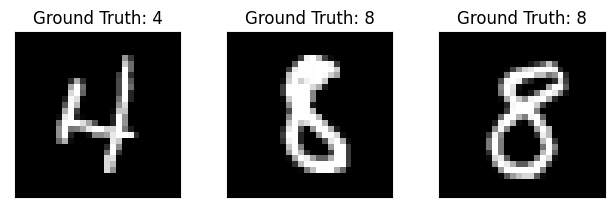

In [2]:

from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt
from torch.nn import functional as F
import torch.optim as optim
import torchvision
n_epochs = 3
batch_size_train = 64
batch_size_test = 1
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
## machine does not have cuda
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

    
class MnistDataset(Dataset):
    def __init__(self, csv_file):

        self.frame = pd.read_csv(csv_file)
       

    def __len__(self):
        return len(self.frame)

    def __getitem__(self, idx):
        img = self.frame.iloc[idx, 1:]
        img = np.array([img]).reshape((28, 28, 1))
        img=torchvision.transforms.ToTensor()(img).float()
        
        label = self.frame.iloc[idx, 0]

        return img, label



train_dir = "../mnist/data/mnist_train.csv"
test_dir = "../mnist/data/mnist_test.csv"

train_dataset = MnistDataset(train_dir)
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size_train,

                          shuffle=True)
test_dataset = MnistDataset(test_dir)

test_loader = DataLoader(test_dataset,
                         batch_size=batch_size_test,

                         shuffle=False)

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

plt.figure()

for i in range(3):
      plt.subplot(1,3,i+1)
      plt.tight_layout()
      plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
      plt.title("Ground Truth: {}".format(example_targets[i]))
      plt.xticks([])
      plt.yticks([])



In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [4]:

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))


def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)

  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

network = NeuralNet()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)    
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/Users/mac/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 1 [0/60000 (0%)]	Loss: 23.857635
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.274156
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.261950
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.316545
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.207268
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.936084
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.855275
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.795214
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.728762
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.360607
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.144432
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.273558
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.463623
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.105683
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.094131
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.148401
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.104034
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.155020
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.056558
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.854280
Train Epoch: 1 [12800/60000 

/Users/mac/anaconda3/envs/torch/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1689, Accuracy: 9501/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.422436
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.811711
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.298076
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.432865
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.684991
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.388187
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.527268
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.494035
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.552358
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.442984
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.462331
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.519640
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.303293
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.444019
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.265420
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.577197
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.323071
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.551833
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.380567
Train Epoch: 2 [12160

Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.303564
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.308043
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.307629
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.431397
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.316955
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.291899
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.151712
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.238296
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.338430
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.412432
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.144561
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.267551
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.289157
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.507820
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.157679
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.557540
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.409872
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.264847
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.464051
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.564618
